# Criando os nomes

In [2]:
import pandas as pd

In [3]:
nomes_f = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f')
nomes_f

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F
3,ANTONIA,0,588783,4,F
4,ADRIANA,0,565621,5,F
...,...,...,...,...,...
195,ROSANE,0,82203,196,F
196,IVONETE,0,81878,197,F
197,LUCIANE,0,81230,198,F
198,ISADORA,0,81100,199,F


In [4]:
nomes_m = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m')
nomes_m

,nome,regiao,freq,rank,sexo
0,JOSE,0,5732508,1,M
1,JOAO,0,2971935,2,M
2,ANTONIO,0,2567494,3,M
3,FRANCISCO,0,1765197,4,M
4,CARLOS,0,1483121,5,M
...,...,...,...,...,...
195,WALTER,0,67207,196,M
196,ARLINDO,0,66669,197,M
197,MICHAEL,0,65736,198,M
198,ALVARO,0,65444,199,M


In [5]:
nomes_f.sample(5)

,nome,regiao,freq,rank,sexo
182,LIDIANE,0,86963,183,F
198,ISADORA,0,81100,199,F
47,LUCIA,0,287153,48,F
184,MARILIA,0,86734,185,F
59,ISABEL,0,238919,60,F


In [6]:
nomes_m.sample(5)

,nome,regiao,freq,rank,sexo
35,ALEXANDRE,0,441663,36,M
192,AGNALDO,0,68920,193,M
84,SEVERINO,0,170111,85,M
39,VITOR,0,419585,40,M
197,MICHAEL,0,65736,198,M


In [7]:
print('Quantidade de nomes: {}'.format(len(nomes_f) + len(nomes_m)))

Quantidade de nomes: 400


In [8]:
frames = [nomes_f, nomes_m]

In [9]:
nomes = pd.concat(frames)['nome'].to_frame()

In [10]:
nomes.sample(5)

,nome
148,JANETE
111,CLEITON
84,SEVERINO
34,SEBASTIAO
180,EDER


# Incluindo ID dos alunos

In [11]:
import numpy as np

In [12]:
np.random.seed(123)

In [13]:
total_alunos = len(nomes)
total_alunos

400

In [14]:
nomes['ID Aluno'] = np.random.permutation(total_alunos) + 1

In [15]:
nomes

,nome,ID Aluno
0,MARIA,235
1,ANA,43
2,FRANCISCA,304
3,ANTONIA,156
4,ADRIANA,343
...,...,...
195,WALTER,231
196,ARLINDO,99
197,MICHAEL,323
198,ALVARO,383


In [16]:
dominios = ['@gmail.com', '@hotmail.com']
nomes['Domínio'] = np.random.choice(dominios, total_alunos)
nomes

,nome,ID Aluno,Domínio
0,MARIA,235,@gmail.com
1,ANA,43,@hotmail.com
2,FRANCISCA,304,@hotmail.com
3,ANTONIA,156,@hotmail.com
4,ADRIANA,343,@hotmail.com
...,...,...,...
195,WALTER,231,@gmail.com
196,ARLINDO,99,@hotmail.com
197,MICHAEL,323,@gmail.com
198,ALVARO,383,@hotmail.com


In [17]:
nomes['E-mail'] = nomes.nome.str.cat(nomes['Domínio']).str.lower()

In [18]:
nomes.head(5)

,nome,ID Aluno,Domínio,E-mail
0,MARIA,235,@gmail.com,maria@gmail.com
1,ANA,43,@hotmail.com,ana@hotmail.com
2,FRANCISCA,304,@hotmail.com,francisca@hotmail.com
3,ANTONIA,156,@hotmail.com,antonia@hotmail.com
4,ADRIANA,343,@hotmail.com,adriana@hotmail.com


# Criando Tabela de Cursos

In [19]:
import html5lib
import lxml

In [20]:
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [21]:
type(cursos)

list

In [22]:
cursos = cursos[0]

In [23]:
type(cursos)

pandas.core.frame.DataFrame

In [24]:
cursos.head(5)

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


# Alterando Index de Cursos

In [25]:
cursos.rename(columns={'Nome do curso': 'nome_do_curso'}, inplace=True)

In [26]:
cursos

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


In [27]:
cursos['ID'] = cursos.index + 1

In [28]:
cursos.head()

,nome_do_curso,ID
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [29]:
cursos.set_index('ID', inplace=True)

In [30]:
cursos.head()

,nome_do_curso
ID,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


# Matriculando os alunos nos cursos

In [35]:
nomes.rename(columns={'nome': 'Nome'}, inplace=True)

In [36]:
nomes.sample(5)

,Nome,ID Aluno,Domínio,E-mail
114,ARTHUR,320,@gmail.com,arthur@gmail.com
57,DAIANE,303,@hotmail.com,daiane@hotmail.com
85,HELENA,221,@gmail.com,helena@gmail.com
183,IRACI,8,@hotmail.com,iraci@hotmail.com
189,DALVA,137,@gmail.com,dalva@gmail.com


In [44]:
nomes['Matrículas'] = np.ceil(np.random.exponential(size=total_alunos) * 1.5).astype(int)

In [45]:
nomes.sample(10)

,Nome,ID Aluno,Domínio,E-mail,Matrículas
12,RAFAEL,162,@gmail.com,rafael@gmail.com,1
92,DIOGO,61,@hotmail.com,diogo@hotmail.com,1
142,RAISSA,286,@hotmail.com,raissa@hotmail.com,1
16,EDUARDO,224,@hotmail.com,eduardo@hotmail.com,1
7,FERNANDA,288,@gmail.com,fernanda@gmail.com,2
23,FERNANDO,321,@gmail.com,fernando@gmail.com,3
172,REBECA,165,@gmail.com,rebeca@gmail.com,1
37,ROSANGELA,333,@gmail.com,rosangela@gmail.com,2
39,VITOR,132,@gmail.com,vitor@gmail.com,1
150,EDMILSON,326,@hotmail.com,edmilson@hotmail.com,1


In [46]:
nomes['Matrículas'].describe()

count    400.00000
mean       2.08750
std        1.46294
min        1.00000
25%        1.00000
50%        2.00000
75%        3.00000
max        9.00000
Name: Matrículas, dtype: float64

In [47]:
import seaborn as sns

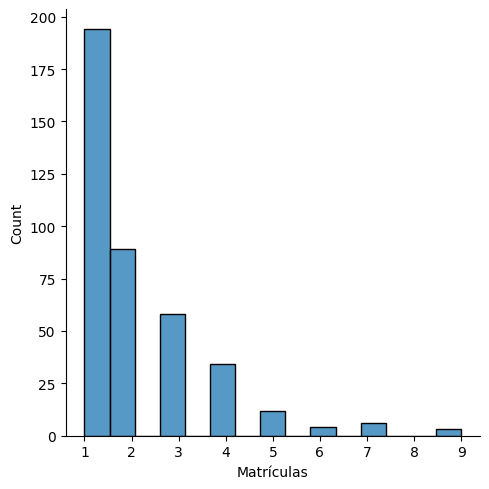

In [56]:
sns.displot(nomes['Matrículas'])

In [58]:
nomes['Matrículas'].value_counts()

1    194
2     89
3     58
4     34
5     12
7      6
6      4
9      3
Name: Matrículas, dtype: int64

In [59]:
nomes.sample(5)

,Nome,ID Aluno,Domínio,E-mail,Matrículas
170,ALEXANDRO,341,@hotmail.com,alexandro@hotmail.com,5
102,MARILENE,149,@gmail.com,marilene@gmail.com,3
153,CLEIDE,368,@gmail.com,cleide@gmail.com,3
3,FRANCISCO,382,@gmail.com,francisco@gmail.com,5
72,GILBERTO,252,@gmail.com,gilberto@gmail.com,2


# Selecionando Cursos

In [60]:
nomes.sample(5)

,Nome,ID Aluno,Domínio,E-mail,Matrículas
127,JULIANO,374,@gmail.com,juliano@gmail.com,1
181,YURI,225,@gmail.com,yuri@gmail.com,1
195,ROSANE,227,@gmail.com,rosane@gmail.com,2
182,CHARLES,33,@gmail.com,charles@gmail.com,1
16,EDUARDO,224,@hotmail.com,eduardo@hotmail.com,1


In [61]:
todas_matriculas = []
x = np.random.rand(20)
prob = x/sum(x)

In [65]:
for index, row in nomes.iterrows():
    id = row['ID Aluno']
    matriculas = row['Matrículas']
    for i in range(matriculas):
        mat = [id, np.random.choice(cursos.index, p = prob)]
        todas_matriculas.append(mat)
        
matriculas = pd.DataFrame(todas_matriculas, columns=['ID Aluno', 'ID Curso'])

In [66]:
matriculas.head(5)

,ID Aluno,ID Curso
0,235,12
1,235,18
2,43,20
3,304,8
4,156,16


In [70]:
matriculas.groupby('ID Curso').count().join(cursos['nome_do_curso']).rename(columns={'ID Aluno': 'Quantidade de Alunos', 'nome_do_curso': 'Nome do Curso'})

,Quantidade de Alunos,Nome do Curso
ID Curso,,
1,45,Lógica de programação
2,11,Java para Web
3,40,C# para Web
4,54,Ruby on Rails
5,49,Cursos de Python
6,29,PHP com MySql
7,47,.NET para web
8,38,Novas integrações com Java
9,30,TDD com Java


In [71]:
nomes.sample(3)

,Nome,ID Aluno,Domínio,E-mail,Matrículas
94,SABRINA,1,@gmail.com,sabrina@gmail.com,2
146,SAMARA,352,@gmail.com,samara@gmail.com,2
19,RODRIGO,133,@hotmail.com,rodrigo@hotmail.com,1


In [72]:
cursos.sample(3)

,nome_do_curso
ID,
15,Análise de dados
19,Boas práticas em Java
20,Orientação objetos com Java


In [73]:
matriculas.sample(3)

,ID Aluno,ID Curso
507,339,14
711,272,18
385,167,10


In [74]:
matriculas_por_curso = matriculas.groupby('ID Curso').count().join(cursos['nome_do_curso']).rename(columns={'ID Aluno': 'Quantidade de Alunos', 'nome_do_curso': 'Nome do Curso'})

In [75]:
matriculas_por_curso.head(5)

,Quantidade de Alunos,Nome do Curso
ID Curso,,
1,45,Lógica de programação
2,11,Java para Web
3,40,C# para Web
4,54,Ruby on Rails
5,49,Cursos de Python


# Saída em Diferentes Formatos

In [76]:
matriculas_por_curso.head(5)

,Quantidade de Alunos,Nome do Curso
ID Curso,,
1,45,Lógica de programação
2,11,Java para Web
3,40,C# para Web
4,54,Ruby on Rails
5,49,Cursos de Python


In [77]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index = False)

In [78]:
pd.read_csv('matriculas_por_curso.csv')

,Quantidade de Alunos,Nome do Curso
0,45,Lógica de programação
1,11,Java para Web
2,40,C# para Web
3,54,Ruby on Rails
4,49,Cursos de Python
5,29,PHP com MySql
6,47,.NET para web
7,38,Novas integrações com Java
8,30,TDD com Java
9,8,Código limpo com C#


In [79]:
matriculas_json = matriculas_por_curso.to_json()

In [80]:
matriculas_json

'{"Quantidade de Alunos":{"1":45,"2":11,"3":40,"4":54,"5":49,"6":29,"7":47,"8":38,"9":30,"10":8,"11":66,"12":55,"13":45,"14":33,"15":69,"16":48,"17":29,"18":55,"19":56,"20":28},"Nome do Curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [85]:
matriculas_html = matriculas_por_curso.to_html('matriculas_por_curso.html')

In [83]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Quantidade de Alunos</th>
      <th>Nome do Curso</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>45</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <td>11</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <td>40</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <td>54</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <td>49</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <td>29</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <td>47</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <td>38</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <td>30</td>
      <td>TDD com Java</td>
    </tr>
    <tr>
      <td>8</td>
      <td>Código limpo com C#</td>
    </tr>
    <tr>
      <td>66</td>
      <td>Preparatório para certificação Java</td>
    </tr>
    <tr>
      <td>55</td>
      <td>Hardware b